Import Data

In [117]:
import pandas as pd

In [118]:
df = pd.read_csv(' https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

Analyse Data

In [119]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [121]:
df.duplicated('CustomerId').sum()

0

In [122]:
df = df.set_index('CustomerId')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


Encoding

In [124]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [125]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [126]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [127]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [128]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [129]:
df.replace({'Num of roducts':{1:0,2:1,3:1,4:1}},inplace=True)

In [130]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [131]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [132]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [133]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  
Churn Geography                    
0     0                      2064  
      1                      1695  
      2                      4204  
1     0                       413  
      1                       814  
      2                       810

Define Label And Features

In [134]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [135]:
X = df.drop(['Surname','Churn'],axis=1)

y = df['Churn']

In [136]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [137]:
X.shape,y.shape

((10000, 10), (10000,))

Random Under Sampling

In [138]:
from imblearn.under_sampling import RandomUnderSampler

In [139]:
rus = RandomUnderSampler(random_state=2529)

In [140]:
X_rus,y_rus=rus.fit_resample(X,y)

In [141]:
X_rus.shape,y_rus.shape

((4074, 10), (4074,))

In [142]:
X.shape,y.shape

((10000, 10), (10000,))

In [143]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [144]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

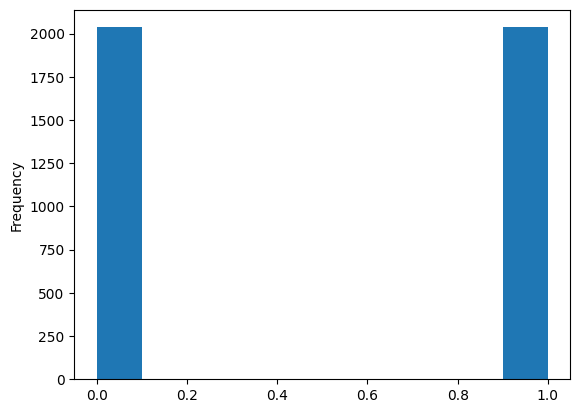

In [145]:
y_rus.plot(kind='hist')

Random Over Sampling

In [146]:
from imblearn.over_sampling import RandomOverSampler

In [147]:
ros = RandomOverSampler(random_state=2529)

In [148]:
X_ros,y_ros=ros.fit_resample(X,y)

In [149]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [150]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

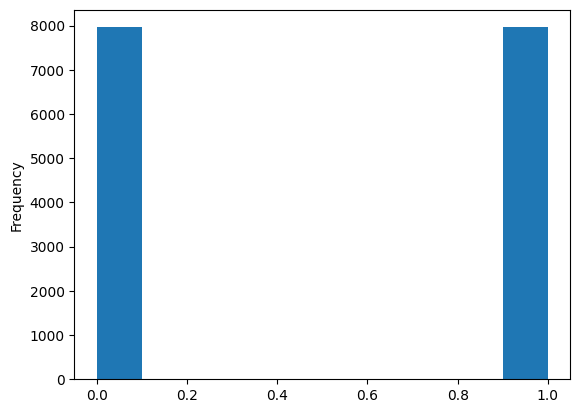

In [151]:
y_ros.plot(kind= 'hist')

Train Test Split

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=2529)

In [154]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.3,random_state=2529)

In [155]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.3,random_state=2529)



In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
sc = StandardScaler()

In [158]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [159]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [160]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [161]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [162]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [163]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [164]:
from sklearn.svm import SVC

In [165]:
svc = SVC()

In [166]:
svc.fit(X_train,y_train)

SVC()

In [167]:
y_pred = svc.predict(X_test)

In [168]:
from sklearn.metrics import confusion_matrix, classification_report

In [169]:
confusion_matrix(y_test,y_pred)

array([[5516,   51],
       [1059,  374]])

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      5567
           1       0.88      0.26      0.40      1433

    accuracy                           0.84      7000
   macro avg       0.86      0.63      0.66      7000
weighted avg       0.85      0.84      0.80      7000



In [171]:
from sklearn.model_selection import GridSearchCV

In [180]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1.0,1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [184]:

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid.fit(X_train,y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END C=0.1, class_weight=balanced, gamma=1.0, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=1.0, kernel=rbf; total time=   0.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=1.0, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=1.0, kernel=rbf; total time=   0.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1.0, 1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [185]:
print(grid.best_estimator_)



SVC(C=0.1, class_weight='balanced', gamma=1.0)


In [186]:
grid_predictions = grid.predict(X_test)

In [187]:
confusion_matrix(y_test,grid_predictions)

array([[4445, 1122],
       [ 511,  922]])

In [188]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84      5567
           1       0.45      0.64      0.53      1433

    accuracy                           0.77      7000
   macro avg       0.67      0.72      0.69      7000
weighted avg       0.81      0.77      0.78      7000



Model With Random Under Sampling

In [189]:
svc_rus = SVC()

In [191]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [194]:
y_pred_rus = svc_rus.predict(X_test_rus)

Model Accuracy

In [195]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[495, 132],
       [180, 416]])

In [196]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       627
           1       0.76      0.70      0.73       596

    accuracy                           0.74      1223
   macro avg       0.75      0.74      0.74      1223
weighted avg       0.75      0.74      0.74      1223



Hyperparameter Tunning

In [ ]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1.0,1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [197]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END C=0.1, class_weight=balanced, gamma=1.0, kernel=rbf; total time=   9.3s
[CV] END C=0.1, class_weight=balanced, gamma=1.0, kernel=rbf; total time=   4.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.1s
[CV] END ..C=1, class_weight=balanced, gamma=1.0, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=1.0, kernel=rbf; total time=   4.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1.0, 1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [198]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1.0)


In [199]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [200]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2081,  298],
       [  56, 2343]])

In [201]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2379
           1       0.89      0.98      0.93      2399

    accuracy                           0.93      4778
   macro avg       0.93      0.93      0.93      4778
weighted avg       0.93      0.93      0.93      4778

